## Neural Network Analysis
## MLP_ Multilayer Perceptron 

**Artificial neural networks** (**ANNs**) are computing systems vaguely inspired by the **biological neural networks** that constitute animal brains.

An ANN is based on a collection of connected units or nodes called **artificial neurons**, which loosely model the neurons in a biological brain. Each connection, like the synapses in a biological brain, can transmit a signal to other neurons.

A **multilayer perceptron** (**MLP**) is a class of feedforward **artificial neural network** (**ANN**).

### Import_Libraries

In [87]:
# Pandas and Numpy
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (15,10)

# Umbalance Data Viz
from sklearn.manifold import TSNE

# Umbalance Data
from collections import Counter
# Under-sampling
from imblearn.under_sampling import NearMiss
# Over-sampling
from imblearn.over_sampling import SMOTE
# Under/Over-sampling
from imblearn.combine import SMOTETomek


# Train/Test
from sklearn.model_selection import train_test_split

# Neural Network (Multilayer Perceptron)
from sklearn.neural_network import MLPClassifier

# Evaluation

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import metrics

# Cross Validation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

## Data

#### Data Normalized

In [3]:
churn_norm = pd.read_csv("Churn_Norm.csv")
churn_norm.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender_Int,Geography_Germany,Geography_Spain,Balance_Int
0,0.538,0.324324,0.2,0.000000,0.000000,1.0,1.0,0.506735,1.0,1.0,0.0,0.0,0.0
1,0.516,0.310811,0.1,0.334031,0.000000,0.0,1.0,0.562709,0.0,1.0,0.0,1.0,1.0
2,0.304,0.324324,0.8,0.636357,0.666667,1.0,0.0,0.569654,1.0,1.0,0.0,0.0,1.0
3,0.698,0.283784,0.1,0.000000,0.333333,0.0,0.0,0.469120,0.0,1.0,0.0,0.0,0.0
4,1.000,0.337838,0.2,0.500246,0.000000,1.0,1.0,0.395400,0.0,1.0,0.0,1.0,1.0


In [8]:
# Variables
X_norm = churn_norm.drop(['Exited'],axis=1)
# Target
y_norm = pd.DataFrame(churn_norm['Exited'])

#### Data Normalized+LDA

This dataset contains an additional column with the results of the LDA (notebook: `PCA and LDA`)

In [7]:
churn_norm_LDA = pd.read_csv("Churn_Norm_LDA.csv")
churn_norm_LDA.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender_Int,Geography_Germany,Geography_Spain,Balance_Int,PC1
0,0.538,0.324324,0.2,0.000000,0.000000,1.0,1.0,0.506735,1.0,1.0,0.0,0.0,0.0,-0.244017
1,0.516,0.310811,0.1,0.334031,0.000000,0.0,1.0,0.562709,0.0,1.0,0.0,1.0,1.0,-0.036741
2,0.304,0.324324,0.8,0.636357,0.666667,1.0,0.0,0.569654,1.0,1.0,0.0,0.0,1.0,0.868267
3,0.698,0.283784,0.1,0.000000,0.333333,0.0,0.0,0.469120,0.0,1.0,0.0,0.0,0.0,0.388012
4,1.000,0.337838,0.2,0.500246,0.000000,1.0,1.0,0.395400,0.0,1.0,0.0,1.0,1.0,-0.021615


In [9]:
# Variables
X_norm_LDA = churn_norm_LDA.drop(['Exited'],axis=1)
# Target
y_norm_LDA = pd.DataFrame(churn_norm_LDA['Exited'])

## Unbalance Data

We use the "Churn_Norm.csv" dataset to extimate how much is the dataset unbalanced (percentage of churn (Exit clients) / No churn (Not Exited Clients)).

In [10]:
churn = churn_norm["Exited"].value_counts()[0]
no_churn = churn_norm["Exited"].value_counts()[1]
perc_churn = round(churn*100/len(churn_norm),2)
perc_no_churn = round(no_churn*100/len(churn_norm),2)

print(f'Distribuition f the clients: {perc_churn}% Churn, {perc_no_churn}% No Churn. The dataset is unbalanced.')

Distribuition f the clients: 79.63% Churn, 20.37% No Churn. The dataset is unbalanced.


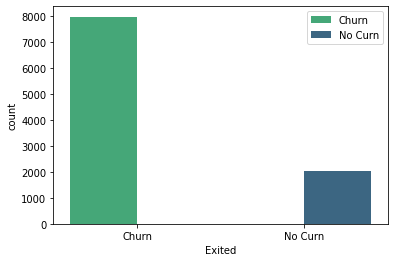

In [11]:
# Viz Exited/Not exited clients
ax = sns.countplot(x=churn_norm["Exited"],hue=churn_norm["Exited"],palette="viridis_r");

exited = ["Churn", "No Curn"]

ax.set_xticklabels(exited)
ax.legend(exited) 
plt.show()

### TSNE t-distributed Stochastic Neighbor Embedding

**TSNE** t-distributed Stochastic Neighbor Embedding

In [12]:
X_embedded = TSNE(n_components=2).fit_transform(X_norm)
X_embedded.shape

(10000, 2)

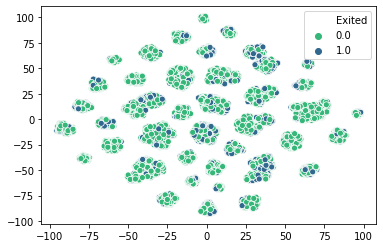

In [13]:
sns.scatterplot(x=X_embedded[:,0],y=X_embedded[:,1], hue=churn_norm['Exited'], palette='viridis_r');

**Conclusion**
There is no clear separation between the two groups.

## Function Resampling

In [16]:
def resampling_df (df, target, scaler):
    
    """
    Function that returns:
    - Resampled dataset
    - TSNE
    """
    
    X = df.drop(target, axis = 1)
    y = df[target]
    
    # Train/Test split (90/10)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state=0, stratify=y)
    # Scaler
    X_res, y_res = scaler.fit_sample(X_train, y_train.ravel())
    
    # Count new values
    count = Counter(y_res)
    print(f'Original dataset shape: {Counter(y_train)}')
    print(f'Resampled dataset shape: {Counter(y_res)}')
          
    # TSNE
    X_embedded = TSNE(n_components=2).fit_transform(X_res)

    # Viz distribution
    sns.scatterplot(x=X_embedded[:, 0], y=X_embedded[:, 1], hue=y_res, palette='viridis')
    plt.legend(loc='best')
    plt.show()
    
    df_red = pd.DataFrame(X_res, columns = df.columns[:-1])
    df_red[target] = y_res
    
    return df_red

### Under-Sampling

**Near Miss** is an under-sampling technique. It aims to balance class distribution by randomly eliminating majority class examples.

- **NearMiss-1**: Majority class examples with minimum average distance to three closest minority class examples.

Original dataset shape: Counter({0.0: 7169, 1.0: 1831})
Resampled dataset shape: Counter({0.0: 1831, 1.0: 1831})


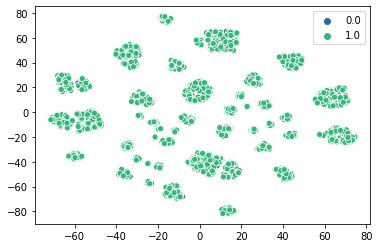

In [17]:
nm_1 = resampling_df (churn_norm, "Exited", NearMiss(version=1))

### Over-Sampling

**SMOTE** is an oversampling method that synthesizes new plausible examples in the majority class.

Original dataset shape: Counter({0.0: 7169, 1.0: 1831})
Resampled dataset shape: Counter({0.0: 7169, 1.0: 7169})


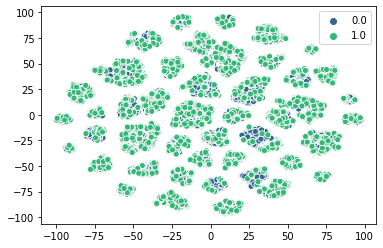

In [18]:
smote = resampling_df (churn_norm, "Exited", SMOTE(random_state = 2))

### Combine Sampling Technique

**SMOTEtomek** is a combination of **SMOTE** and **Tomek Links** to balance our data.

- **SMOTE** is an oversampling method that synthesizes new plausible examples in the majority class.

- **Tomek Links** is an undersampling method that remove unwanted overlap between classes where majority class links are removed until all minimally distanced nearest neighbor pairs are of the same class.

Original dataset shape: Counter({0.0: 7169, 1.0: 1831})
Resampled dataset shape: Counter({0.0: 7039, 1.0: 7039})


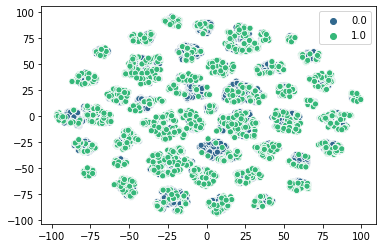

In [19]:
smote_tomek = resampling_df (churn_norm, "Exited", SMOTETomek())

### Conclusions

Resampling techniques tested is not able to separe targets into two groups in a two-dimensional problem.

Even if all the resampling techniques are similar, we consider that the most effective one is: **SMOTEtomek**

In [94]:
smote_tomek.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender_Int,Geography_Germany,Geography_Spain
0,0.556,0.216216,0.4,0.632693,0.333333,1.0,1.0,0.630965,0.0,0.0,0.0,0.0
1,0.732,0.459459,0.7,0.262942,0.333333,1.0,0.0,0.072989,1.0,1.0,0.0,0.0
2,0.534,0.094595,0.1,0.408875,0.333333,1.0,1.0,0.576934,0.0,0.0,0.0,0.0
3,0.442,0.202703,0.9,0.000000,0.333333,0.0,1.0,0.387577,0.0,1.0,0.0,0.0
4,0.694,0.189189,0.7,0.699347,0.666667,1.0,0.0,0.582210,1.0,0.0,0.0,0.0


In [96]:
# Dimensions
print(f'Original dataset rows: {len(churn_norm)}')
print(f'Resampled dataset rows: {len(smote_tomek)}')

Original dataset rows: 10000
Resampled dataset rows: 14078


In [97]:
# Variables
X_smote_tomek = smote_tomek.drop(['Exited'],axis=1)
# Target
y_smote_tomek = pd.DataFrame(smote_tomek['Exited'])

## Model MLPC

#### Metrics for Evaluation

- **Accuracy** tells you what percentage of the predictions are correct.
- **Precision** tells us the following: from the positive predictions I have made, what percentage are positive.
- **Recall** (opposed to precision), is useful when the cost of a false negative is high. It tells us: of all the positive predictions, what percentage confirms the predicition.
- **F1-score** seeks a balance between precision and recall.

#### Target

Predict how many customers want to leave the bank.

#### Hypothesis

We train a **Neural Network** with the default parameters to check if it is good model for our data and how good it is.

### Function for the Evaluation of the Model

In [122]:
def model_accuracy(X,y, model=MLPClassifier(random_state=1, max_iter=1000)):
    
    '''
    Function that returns the accuracy of the model
    '''
    
    # Train/Test (90/10)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=0, stratify=y)
   
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Train Accuracy
    train_accuracy = round(model.score(X_train, y_train) * 100, 2)  
    # Test Accuracy
    test_accuracy = round(model.score(X_test, y_test) * 100, 2)
    
    if train_accuracy > test_accuracy:
        print('Please check overfitting!')
    else:
        print('Test results are better than train test!')
        
    # Classification Report
    cr = classification_report(y_test, y_pred)
    
    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    
    # Valisation Score
    scores = cross_val_score(model, X_train, y_train, cv=StratifiedKFold())
    
    return train_accuracy, test_accuracy, cr, cm, scores

### MLPC_not_incl_LDA

In [123]:
mlpc = model_accuracy(X_norm, y_norm)

D:\ANACONDA\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Please heck overfitting!


D:\ANACONDA\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
D:\ANACONDA\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
D:\ANACONDA\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
D:\ANACONDA\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
D:\ANACONDA\lib\site-packages\sklearn\utils\

#### Accuracy

In [66]:
print(f'TRAIN accuracy: {mlpc[0]} %')
print(f'TEST accuracy_norm: {mlpc[1]} %')

TRAIN accuracy: 87.77 %
TEST accuracy_norm: 84.9 %


#### Classification Report

In [69]:
print(f'Classification Report')
print(f'{mlpc[2]}')

Classification Report
              precision    recall  f1-score   support

         0.0       0.87      0.95      0.91       796
         1.0       0.70      0.46      0.55       204

    accuracy                           0.85      1000
   macro avg       0.79      0.70      0.73      1000
weighted avg       0.84      0.85      0.84      1000



#### Confusion Matrix

A **confusion matrix** tells us the performance of our algorithm or test, where the rows are the actual data and the columns the predictions (or vice versa).

In [86]:
print(f'Confusion Matrix')
cm = mlpc[3]
print(f'{cm}')

print(35*'-')
# Results
print(f'T0 (True Not Churn): {cm[0][0]} ({round(cm[0][0]*100/sum(cm[0]),2)}%)')
print(f'F0 (False Not Churn): {cm[0][1]} ({round(cm[0][1]*100/sum(cm[0]),2)}%)')
print(f'T1 (True Churn): {cm[1][1]} ({round(cm[1][1]*100/sum(cm[1]),2)}%)')
print(f'F1 (False Churn): {cm[1][0]} ({round(cm[1][0]*100/sum(cm[1]),2)}%)')

Confusion Matrix
[[756  40]
 [111  93]]
-----------------------------------
T0 (True Not Churn): 756 (94.97%)
F0 (False Not Churn): 40 (5.03%)
T1 (True Churn): 93 (45.59%)
F1 (False Churn): 111 (54.41%)


#### Conclusion
We can see that the MLPC classifier struggled at predicting the clients that churned/exited the bank (the target that interests us most).

### MLPC_incl_LDA

In [91]:
mlpc_LDA = model_accuracy(X_norm_LDA, y_norm_LDA)

D:\ANACONDA\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Check overfitting


#### Accuracy

In [99]:
print(f'TRAIN accuracy: {mlpc_LDA[0]} %')
print(f'TEST accuracy_norm: {mlpc_LDA[1]} %')

TRAIN accuracy: 87.06 %
TEST accuracy_norm: 84.8 %


#### Classification Report

In [100]:
print(f'Classification Report')
print(f'{mlpc_LDA[2]}')

Classification Report
              precision    recall  f1-score   support

         0.0       0.86      0.96      0.91       796
         1.0       0.72      0.41      0.53       204

    accuracy                           0.85      1000
   macro avg       0.79      0.69      0.72      1000
weighted avg       0.84      0.85      0.83      1000



#### Confusion Matrix

In [110]:
print(f'Confusion Matrix')
cm_LDA = mlpc_LDA[3]
print(f'{cm_LDA}')

print(35*'-')
# Results
print(f'T0 (True Not Churn): {cm_LDA[0][0]} ({round(cm_LDA[0][0]*100/sum(cm_LDA[0]),2)}%)')
print(f'F0 (False Not Churn): {cm_LDA[0][1]} ({round(cm_LDA[0][1]*100/sum(cm_LDA[0]),2)}%)')
print(f'T1 (True Churn): {cm_LDA[1][1]} ({round(cm_LDA[1][1]*100/sum(cm_LDA[1]),2)}%)')
print(f'F1 (False Churn): {cm_LDA[1][0]} ({round(cm_LDA[1][0]*100/sum(cm_LDA[1]),2)}%)')

Confusion Matrix
[[764  32]
 [120  84]]
-----------------------------------
T0 (True Not Churn): 764 (95.98%)
F0 (False Not Churn): 32 (4.02%)
T1 (True Churn): 84 (41.18%)
F1 (False Churn): 120 (58.82%)


#### Conclusions
We can see that adding LDA to the original dataset does not improve the performance of the MLPC classifier but actually makes it worse.

### MLPC_Resampled_Data (SMOTEtomek)

In [124]:
mlpc_smote_tomek = model_accuracy(X_smote_tomek, y_smote_tomek)

D:\ANACONDA\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Please heck overfitting!


D:\ANACONDA\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
D:\ANACONDA\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
D:\ANACONDA\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
D:\ANACONDA\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
D:\ANACONDA\lib\site-packages\sklearn\utils\

#### Accuracy

In [121]:
print(f'TRAIN accuracy: {mlpc_smote_tomek[0]} %')
print(f'TEST accuracy_norm: {mlpc_smote_tomek[1]} %')

TRAIN accuracy: 86.14 %
TEST accuracy_norm: 85.01 %


#### Classification Report

In [102]:
print(f'Classification Report')
print(f'{mlpc_smote_tomek[2]}')

Classification Report
              precision    recall  f1-score   support

         0.0       0.85      0.85      0.85       704
         1.0       0.85      0.85      0.85       704

    accuracy                           0.85      1408
   macro avg       0.85      0.85      0.85      1408
weighted avg       0.85      0.85      0.85      1408



#### Confusion Matrix

In [108]:
print(f'Confusion Matrix')
cm_smote_tomek = mlpc_smote_tomek[3]
print(f'{cm_smote_tomek}')

print(35*'-')
# Results
print(f'T0 (True Not Churn): {cm_smote_tomek[0][0]} ({round(cm_smote_tomek[0][0]*100/sum(cm_smote_tomek[0]),2)}%)')
print(f'F0 (False Not Churn): {cm_smote_tomek[0][1]} ({round(cm_smote_tomek[0][1]*100/sum(cm_smote_tomek[0]),2)}%)')
print(f'T1 (True Churn): {cm_smote_tomek[1][1]} ({round(cm_smote_tomek[1][1]*100/sum(cm_smote_tomek[1]),2)}%)')
print(f'F1 (False Churn): {cm_smote_tomek[1][0]} ({round(cm_smote_tomek[1][0]*100/sum(cm_smote_tomek[1]),2)}%)')

Confusion Matrix
[[596 108]
 [103 601]]
-----------------------------------
T0 (True Not Churn): 596 (84.66%)
F0 (False Not Churn): 108 (15.34%)
T1 (True Churn): 601 (85.37%)
F1 (False Churn): 103 (14.63%)


#### Conclusions
We can see that the MLPC classifier for resampled data is so far the best algorithm at predicting the clients that churned/exited the bank.

## Conclusions

The best model for a **Neuronal Network Analysis** is the one thaat uses **resampled data**. 

We  will proceed with a **deeper analysis** using a **Grid Search** to find the best parameters for the model. There is room for model improvement.

### Cross Validation MLPC_Resampled_Data (SMOTEtomek)

If a Neural Network is a good model for our data, we  will proceed with a **deeper analysis** using a **Grid Search** to find the best parameters for the model. 

In [137]:
score = mlpc_smote_tomek[4]

print(f'Cross Validation Score (Median): {score} --> {round(np.median(score)*100,2)}% accuracy')
print(f'Numbers of Score Calculations: {len(score)}')

Cross Validation Score (Median): [0.80781373 0.82794002 0.81649566 0.82399369 0.84056827] --> 82.4% accuracy
Numbers of Score Calculations: 5


### Validation Curve

### Learning Curve

In [ ]:
# Heatmap cross validation
# Values Classification Report